In [266]:
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
df = pd.read_csv('jucatori.csv')

In [268]:
df.head()

,Name,Goals,Assists,Minutes,Solo runs into attacking third,Solo runs into key area,Solo runs into penalty area,Deliveries into attacking third,Deliveries into a key area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
0,Antoine Griezmann,6,2,555,11,11,5,21,17,11,26,14,0,0,4,5,1
1,Cristiano Ronaldo,3,3,625,18,11,4,20,14,5,46,12,0,1,8,0,0
2,Olivier Giroud,3,2,456,3,0,3,8,6,2,15,6,0,1,6,0,0
3,Dimitri Payet,3,2,506,22,17,12,32,24,32,20,7,0,0,2,1,0
4,Gareth Bale,3,1,533,27,21,6,21,11,8,25,16,0,1,5,3,1


In [269]:
df.drop(['Solo runs into attacking third','Solo runs into key area',\
'Deliveries into attacking third','Deliveries into a key area'],axis=1,inplace=True)

In [270]:
df.head()

,Name,Goals,Assists,Minutes,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
0,Antoine Griezmann,6,2,555,5,11,26,14,0,0,4,5,1
1,Cristiano Ronaldo,3,3,625,4,5,46,12,0,1,8,0,0
2,Olivier Giroud,3,2,456,3,2,15,6,0,1,6,0,0
3,Dimitri Payet,3,2,506,12,32,20,7,0,0,2,1,0
4,Gareth Bale,3,1,533,6,8,25,16,0,1,5,3,1


In [271]:
df.set_index('Name',inplace=True)

In [272]:
df1 = df.copy()

In [273]:
coloane = df1.columns.tolist()
coloane.remove('Minutes')

In [274]:
for col in coloane:
    df1[col] = df1[col] / df1['Minutes']

df1.drop('Minutes',axis=1,inplace=True)

In [275]:
df1.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
Name,,,,,,,,,,,
Antoine Griezmann,0.010811,0.003604,0.009009,0.019820,0.046847,0.025225,0.0,0.000000,0.007207,0.009009,0.001802
Cristiano Ronaldo,0.004800,0.004800,0.006400,0.008000,0.073600,0.019200,0.0,0.001600,0.012800,0.000000,0.000000
Olivier Giroud,0.006579,0.004386,0.006579,0.004386,0.032895,0.013158,0.0,0.002193,0.013158,0.000000,0.000000
Dimitri Payet,0.005929,0.003953,0.023715,0.063241,0.039526,0.013834,0.0,0.000000,0.003953,0.001976,0.000000
Gareth Bale,0.005629,0.001876,0.011257,0.015009,0.046904,0.030019,0.0,0.001876,0.009381,0.005629,0.001876


In [276]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

In [277]:

normalizer = StandardScaler(copy=False)
normalizer.fit_transform(df1)

array([[  4.33454227e+00,   1.34919285e+00,   8.29062366e-01, ...,
         -6.52384087e-01,   1.15872964e+00,  -3.33226871e-01],
       [  1.69263292e+00,   1.92376516e+00,   4.14590517e-01, ...,
         -1.95612374e-01,  -6.88291331e-01,  -6.78727860e-01],
       [  2.47452705e+00,   1.72492379e+00,   4.43018416e-01, ...,
         -1.66382578e-01,  -6.88291331e-01,  -6.78727860e-01],
       ..., 
       [ -4.17093249e-01,  -3.81446641e-01,  -6.02124959e-01, ...,
         -7.22458294e-01,  -3.74363221e-02,   1.45186157e+00],
       [ -4.17093249e-01,  -3.81446641e-01,  -6.02124959e-01, ...,
         -7.32150801e-01,  -4.96018363e-02,   1.11335671e+00],
       [ -4.17093249e-01,  -3.81446641e-01,  -3.61425273e-01, ...,
         -3.56063145e-03,  -3.77655986e-01,  -9.76580155e-02]])

In [278]:
df1.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
Name,,,,,,,,,,,
Antoine Griezmann,4.334542,1.349193,0.829062,0.907426,2.235545,3.320213,-0.075378,-0.645252,-0.652384,1.158730,-0.333227
Cristiano Ronaldo,1.692633,1.923765,0.414591,-0.158653,4.078032,2.359938,-0.075378,-0.222420,-0.195612,-0.688291,-0.678728
Olivier Giroud,2.474527,1.724924,0.443018,-0.484618,1.274664,1.396974,-0.075378,-0.065713,-0.166383,-0.688291,-0.678728
Dimitri Payet,2.188794,1.516784,3.165348,4.823774,1.731337,1.504727,-0.075378,-0.645252,-0.918195,-0.283115,-0.678728
Gareth Bale,2.056788,0.519590,1.186188,0.473552,2.239502,4.084186,-0.075378,-0.149436,-0.474858,0.465664,-0.318966


In [279]:
dataL2 = pairwise_distances(df1, metric='l2')

In [280]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])

A[np.triu_indices_from(A,k=1)]

array([2, 3, 3])

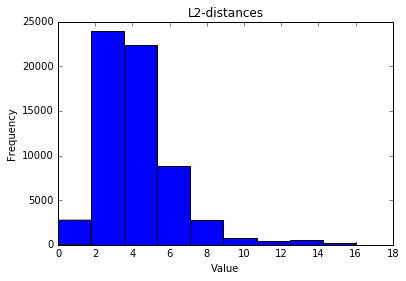

In [281]:

plt.hist(dataL2[np.triu_indices_from(dataL2,k=1)])
plt.title("L2-distances")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [282]:
dataL1 = pairwise_distances(df1, metric='l1')

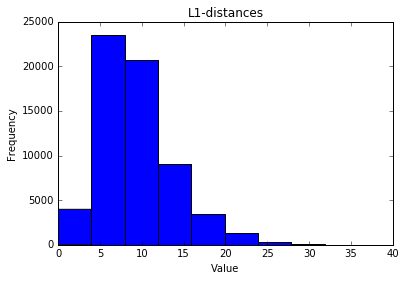

In [283]:
plt.hist(dataL1[np.triu_indices_from(dataL1,k=1)])
plt.title("L1-distances")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [284]:
dataCosine = pairwise_distances(df1, metric='cosine')

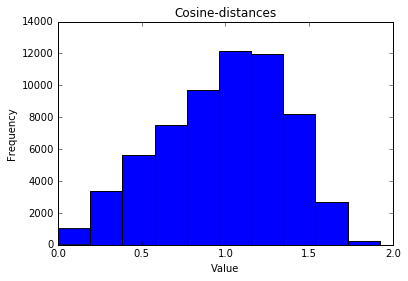

In [285]:
#A[np.triu_indices_from(A,k=1)]
plt.hist(dataCosine[np.triu_indices_from(dataCosine,k=1)])
plt.title("Cosine-distances")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [286]:
from scipy.cluster.hierarchy import dendrogram, linkage


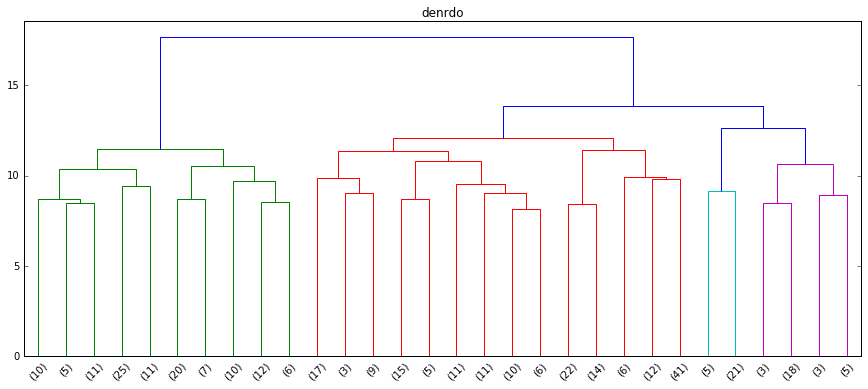

In [287]:
linkage_matrix = linkage(dataCosine, "complete")
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix,truncate_mode='lastp')
plt.title('denrdo')
plt.show()

In [288]:
from sklearn.cluster import AgglomerativeClustering

In [289]:
clusterizare = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')

In [290]:
y = clusterizare.fit_predict(df1)

In [291]:
df['cluster'] = y

In [292]:
df.head(3)

,Goals,Assists,Minutes,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks,cluster
Name,,,,,,,,,,,,,
Antoine Griezmann,6,2,555,5,11,26,14,0,0,4,5,1,0
Cristiano Ronaldo,3,3,625,4,5,46,12,0,1,8,0,0,0
Olivier Giroud,3,2,456,3,2,15,6,0,1,6,0,0,0


In [293]:
for i in set(y):
    print 'A proposrtion of ', len(df[df['cluster'] == i]) / float(len(df)), 'players are in the cluster ', i

A proposrtion of  0.330508474576 players are in the cluster  0
A proposrtion of  0.316384180791 players are in the cluster  1
A proposrtion of  0.21186440678 players are in the cluster  2
A proposrtion of  0.141242937853 players are in the cluster  3


In [294]:
from sklearn.decomposition import PCA


In [295]:
pca = PCA(n_components=2)
dfSmall = pd.DataFrame(pca.fit_transform(df1), index = df1.index, columns = ['firstComp',\
                                                                            'secondComp'])


In [296]:
dfSmall['cluster'] = y

In [297]:
dfSmall.head()

,firstComp,secondComp,cluster
Name,,,
Antoine Griezmann,-5.330951,0.697611,0
Cristiano Ronaldo,-4.644956,0.856424,0
Olivier Giroud,-2.912013,0.724922,0
Dimitri Payet,-5.638030,-1.912259,0
Gareth Bale,-4.672945,0.859801,0


In [298]:
from bokeh.charts import Scatter, output_notebook, show #, output_file
output_notebook()

Loading BokehJS ...

In [299]:
p = Scatter(dfSmall, x='firstComp', y='secondComp', color='cluster',\
            title="Player position", xlabel="first principal component",\
            ylabel="second princ component",legend="top_right")

#output_file("scatter.html")

show(p)

In [300]:
df2 = df1.copy()
df2.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
Name,,,,,,,,,,,
Antoine Griezmann,4.334542,1.349193,0.829062,0.907426,2.235545,3.320213,-0.075378,-0.645252,-0.652384,1.158730,-0.333227
Cristiano Ronaldo,1.692633,1.923765,0.414591,-0.158653,4.078032,2.359938,-0.075378,-0.222420,-0.195612,-0.688291,-0.678728
Olivier Giroud,2.474527,1.724924,0.443018,-0.484618,1.274664,1.396974,-0.075378,-0.065713,-0.166383,-0.688291,-0.678728
Dimitri Payet,2.188794,1.516784,3.165348,4.823774,1.731337,1.504727,-0.075378,-0.645252,-0.918195,-0.283115,-0.678728
Gareth Bale,2.056788,0.519590,1.186188,0.473552,2.239502,4.084186,-0.075378,-0.149436,-0.474858,0.465664,-0.318966


In [301]:
df2.columns

Index([u'Goals', u'Assists', u'Solo runs into penalty area',
       u'Deliveries into penalty area', u'Total attempts', u'On target',
       u'Red cards', u'Yellow cards', u'Fouls committed', u'Tackles',
       u'Blocks'],
      dtype='object')

In [302]:
df2['offensive'] = df2['Goals'] +  df2['Solo runs into penalty area'] + df2['Total attempts']
df2['defensive'] = df2['Tackles'] + df2['Blocks']
df2['cluster'] = y

In [303]:
df2 = df2[['offensive', 'defensive', 'cluster']]

In [304]:
p1 = Scatter(df2, x='offensive', y='defensive', color='cluster',\
            title="Player attitude", xlabel="offensive attitude",\
            ylabel="defensive attitude",legend="top_right")

#output_file("scatter.html")

show(p1)

In [305]:
df1['Cluster'] = y
df1.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks,Cluster
Name,,,,,,,,,,,,
Antoine Griezmann,4.334542,1.349193,0.829062,0.907426,2.235545,3.320213,-0.075378,-0.645252,-0.652384,1.158730,-0.333227,0
Cristiano Ronaldo,1.692633,1.923765,0.414591,-0.158653,4.078032,2.359938,-0.075378,-0.222420,-0.195612,-0.688291,-0.678728,0
Olivier Giroud,2.474527,1.724924,0.443018,-0.484618,1.274664,1.396974,-0.075378,-0.065713,-0.166383,-0.688291,-0.678728,0
Dimitri Payet,2.188794,1.516784,3.165348,4.823774,1.731337,1.504727,-0.075378,-0.645252,-0.918195,-0.283115,-0.678728,0
Gareth Bale,2.056788,0.519590,1.186188,0.473552,2.239502,4.084186,-0.075378,-0.149436,-0.474858,0.465664,-0.318966,0


In [306]:
framelist = []
for cl in set(y):
    frame = df1[df1['Cluster'] == cl]
    name = str(cl)
    data = frame.mean(axis=0).to_frame(name=name)
    framelist.append(data)
    

In [307]:
centroidsDf = pd.concat(framelist,axis=1)

In [308]:
centroidsDf

,0,1,2,3
Goals,0.753128,-0.362210,-0.355917,-0.417093
Assists,0.395850,-0.334341,0.109811,-0.342082
Solo runs into penalty area,0.581985,-0.447813,0.069149,-0.462467
Deliveries into penalty area,0.631561,-0.376981,-0.127531,-0.442118
Total attempts,0.910037,-0.513629,-0.529223,-0.185125
On target,0.879822,-0.476286,-0.546234,-0.172550
Red cards,-0.075378,-0.075378,-0.075378,0.458297
Yellow cards,-0.245679,-0.256392,-0.106207,1.308516
Fouls committed,-0.153558,-0.425222,0.054973,1.229361
Tackles,-0.089131,-0.299624,0.850994,-0.396767
